In [345]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Preparation

Data source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [346]:
df = pd.read_csv('./suicide_rates.csv',engine='python', decimal=',', thousands='.')

In [347]:
df.shape

(27820, 12)

In [348]:
df

,ï»¿country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,NaN,2.156.624.900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,519,Albania1987,NaN,2.156.624.900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,483,Albania1987,NaN,2.156.624.900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,459,Albania1987,NaN,2.156.624.900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,328,Albania1987,NaN,2.156.624.900,796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,296,Uzbekistan2014,675.0,63.067.077.179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,258,Uzbekistan2014,675.0,63.067.077.179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,217,Uzbekistan2014,675.0,63.067.077.179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,167,Uzbekistan2014,675.0,63.067.077.179,2309,Generation Z


In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ï»¿country          27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  int64  
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 2.5+ MB


**5 continuous variables (interval/ratio)**
year, suicides_no, population, suicides/100k pop, gdp_per_capita ($)

**3 categorical variables (nominal/ordinal)**
country, sex, age, generation

**General overview of the dataset**
* Number of objects = 27820 , Number of variables = 12
* Variable types (nominal/ordinal/interval/ratio):
    * country - **Nominal**         
    * year - **Interval**
    * sex - **Nominal**
    * age - **Nominal**
    * suicides_no - **Interval**
    * population - **Interval**
    * suicides/100k pop - **Interval**
    * country-year - **Nominal**
    * HDI for year - **Interval** - (Human development index - summary measure of average achievement in key dimensions of human development: a long and healthy life, being knowledgeable and have a decent standard of living)
    *  gdp_for_year - **Interval** - (Gross domestic product (GDP) is a monetary measure of the market value of all the final goods and services produced in a specific time period)
    * gdp_per_capita - **Interval** - (GDP per capita stands for Gross Domestic Product (GDP) per capita (per person))
    * generation - **Nominal**
    


In [350]:
df.columns

Index(['ï»¿country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

## Cleaning data 
Column 'HDI for year' was removed due to 2/3 missing data.\
Changes for the names of some columns were made. \
 


In [351]:
df = df.drop(columns=['HDI for year'], axis = 1)
df = df.rename(columns={'ï»¿country': 'country', ' gdp_for_year ($) ': 'gdp_for_year ($)' })

df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,671,Albania1987,2.156.624.900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,519,Albania1987,2.156.624.900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,483,Albania1987,2.156.624.900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,459,Albania1987,2.156.624.900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,328,Albania1987,2.156.624.900,796,Boomers


In [352]:

# Drop some unnecessary columns
cat_cols = ['sex', 'country', 'year', 'age']
num_cols = ['suicides_no', 'population', 'suicides/100k pop', 'gdp_per_capita ($)']

df.drop(df.columns.difference(cat_cols + num_cols), axis=1, inplace=True)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,671,796
1,Albania,1987,male,35-54 years,16,308000,519,796
2,Albania,1987,female,15-24 years,14,289700,483,796
3,Albania,1987,male,75+ years,1,21800,459,796
4,Albania,1987,male,25-34 years,9,274300,328,796
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,296,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,258,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,217,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,167,2309


# Individual columns

Categorical columns:
- Sex
- Country
- Year
- Age

Numerical columns:
- Number of suicides
- Suicides for 100k people per population
- Gross domestic product per person (\\$)

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country             27820 non-null  object
 1   year                27820 non-null  int64 
 2   sex                 27820 non-null  object
 3   age                 27820 non-null  object
 4   suicides_no         27820 non-null  int64 
 5   population          27820 non-null  int64 
 6   suicides/100k pop   27820 non-null  int64 
 7   gdp_per_capita ($)  27820 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


## Basic statistics

In [354]:
# Numerical column statistics
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,1164.331201,16866.464414
std,8.469055,902.047917,3.911779e+06,1834.108308,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,57.000000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,467.500000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,1484.250000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,22497.000000,126352.000000


### Categorical variables

In [355]:
sex_count = df.groupby('sex')['sex'].agg(['count']).reset_index()
sex_count.sort_values('count', ascending=False, inplace=True)
sex_count

,sex,count
0,female,13910
1,male,13910


In [356]:
age_count = df.groupby('age')['age'].agg(['count']).reset_index()
age_count.sort_values('count', ascending=False, inplace=True)
age_count

,age,count
0,15-24 years,4642
1,25-34 years,4642
2,35-54 years,4642
4,55-74 years,4642
5,75+ years,4642
3,5-14 years,4610


In [357]:
year_count = df.groupby('year')['year'].agg(['count']).reset_index()
year_count.sort_values('count', ascending=False, inplace=True)
year_count

,year,count
24,2009,1068
16,2001,1056
25,2010,1056
15,2000,1032
26,2011,1032
22,2007,1032
18,2003,1032
17,2002,1032
23,2008,1020
21,2006,1020


The vast majority of the countries does not have data from 2016, therefore these lines should be deleted

In [358]:
df = df.drop(df[df.year == 2016].index)
df

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
0,Albania,1987,male,15-24 years,21,312900,671,796
1,Albania,1987,male,35-54 years,16,308000,519,796
2,Albania,1987,female,15-24 years,14,289700,483,796
3,Albania,1987,male,75+ years,1,21800,459,796
4,Albania,1987,male,25-34 years,9,274300,328,796
...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,296,2309
27816,Uzbekistan,2014,female,75+ years,9,348465,258,2309
27817,Uzbekistan,2014,male,5-14 years,60,2762158,217,2309
27818,Uzbekistan,2014,female,5-14 years,44,2631600,167,2309


In [359]:
country_count = df.groupby('country')['country'].agg(['count']).reset_index()
country_count.sort_values('count', ascending=False, inplace=True)
country_count

,country,count
15,Brazil,372
41,Iceland,372
44,Italy,372
20,Colombia,372
19,Chile,372
...,...,...
64,Oman,36
14,Bosnia and Herzegovina,24
27,Dominica,12
54,Macau,12


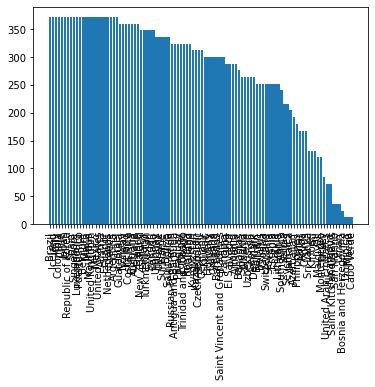

In [360]:
plt.bar(country_count['country'], country_count['count'])
plt.xticks(rotation='vertical')
plt.show()

**Bar chart above is not informative, data was filtered to see the countries with the least (< 100) number of objects**

In [361]:
country_count_filtered = country_count.query('count < 100') 

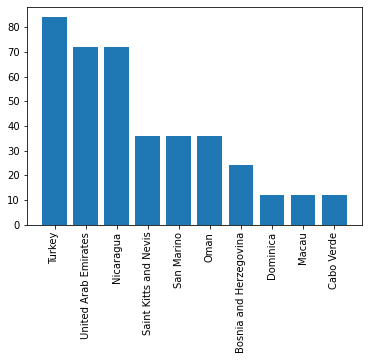

In [362]:
plt.bar(country_count_filtered['country'], country_count_filtered['count'])
plt.xticks(rotation='vertical')
plt.show()

### Numerical variables

<AxesSubplot:>

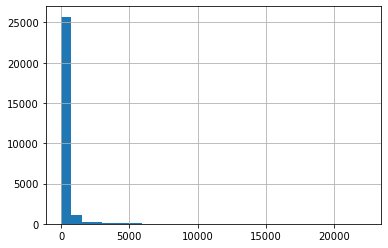

In [363]:
df['suicides_no'].hist(bins=30)

<AxesSubplot:>

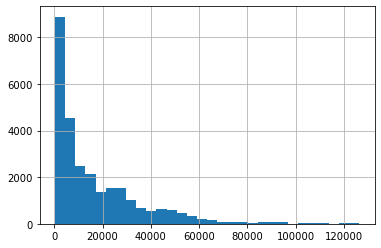

In [364]:
df['gdp_per_capita ($)'].hist(bins=30)

<AxesSubplot:>

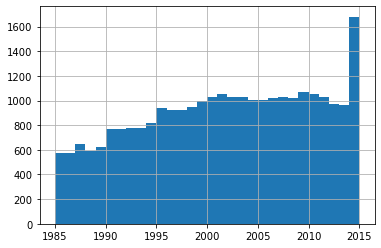

In [365]:
df['year'].hist(bins=30)

<AxesSubplot:>

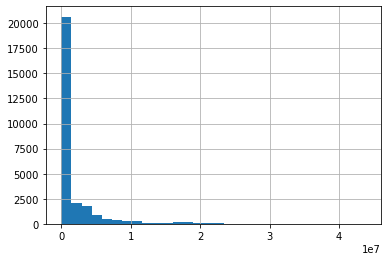

In [366]:
df['population'].hist(bins=30)

<AxesSubplot:>

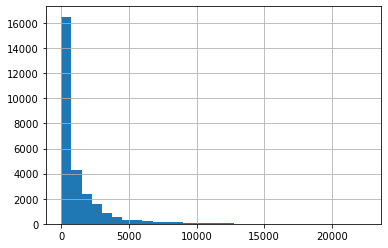

In [367]:
df['suicides/100k pop'].hist(bins=30)

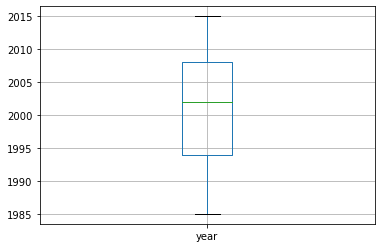

In [368]:
df.boxplot(column=['year'])
plt.show()

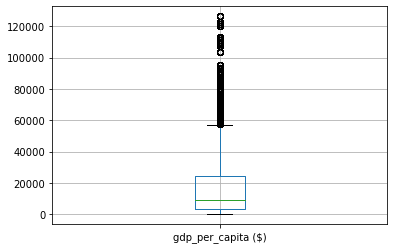

In [369]:
df.boxplot(column=['gdp_per_capita ($)'])
plt.show()

In [370]:
max(df['suicides_no'])

22338

## Outliers

In [371]:
# Determine outliers using interquartile range (IQR)
q1 = df.quantile(0.25)
q1

year                   1994.00
suicides_no               3.00
population            97535.25
suicides/100k pop        57.00
gdp_per_capita ($)     3436.00
Name: 0.25, dtype: float64

In [372]:
q3 = df.quantile(0.75)
q3

year                     2008.00
suicides_no               132.00
population            1491041.25
suicides/100k pop        1482.25
gdp_per_capita ($)      24796.00
Name: 0.75, dtype: float64

In [373]:
iqr = q3 - q1
iqr

year                       14.00
suicides_no               129.00
population            1393506.00
suicides/100k pop        1425.25
gdp_per_capita ($)      21360.00
dtype: float64

In [374]:
# Boolean series indicating whether the row 
# is considered as outlier (False) or not (True)
non_outliers_iqr = ~((df < (q1 - 1.5 * iqr)) |(df > (q3 + 1.5 * iqr))).any(axis=1)

In [395]:
non_outliers_iqr

0         True
1         True
2         True
3         True
4         True
         ...  
27815    False
27816     True
27817     True
27818     True
27819     True
Length: 27660, dtype: bool

In [401]:
print(non_outliers_iqr.value_counts())


True     19908
False     7752
dtype: int64


## Missing values
**There is no missing values in a dataset.**

In [376]:
non_missing = ~df['gdp_per_capita ($)'].isnull()
non_missing.describe()

count     27660
unique        1
top        True
freq      27660
Name: gdp_per_capita ($), dtype: object

# Column combinations

In [377]:
# Covariance
df.cov()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,70.875418,-2.248833e+01,3.823068e+05,-5.690962e+02,5.380705e+04
suicides_no,-22.488332,8.181025e+05,2.184829e+09,4.701846e+05,1.060594e+06
population,382306.774891,2.184829e+09,1.537156e+13,5.402050e+07,6.138283e+09
suicides/100k pop,-569.096160,4.701846e+05,5.402050e+07,3.367361e+06,4.103321e+04
gdp_per_capita ($),53807.045187,1.060594e+06,6.138283e+09,4.103321e+04,3.557594e+08


In [378]:
# Correlation (with outliers)
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.002953,0.011583,-0.036838,0.338854
suicides_no,-0.002953,1.000000,0.616105,0.283282,0.062168
population,0.011583,0.616105,1.000000,0.007509,0.083006
suicides/100k pop,-0.036838,0.283282,0.007509,1.000000,0.001186
gdp_per_capita ($),0.338854,0.062168,0.083006,0.001186,1.000000


In [379]:
# Correlation (without outliers)
df[non_outliers_iqr].corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.013013,0.003248,-0.034746,0.290278
suicides_no,-0.013013,1.000000,0.531178,0.486028,0.091832
population,0.003248,0.531178,1.000000,-0.042056,0.024967
suicides/100k pop,-0.034746,0.486028,-0.042056,1.000000,0.082608
gdp_per_capita ($),0.290278,0.091832,0.024967,0.082608,1.000000


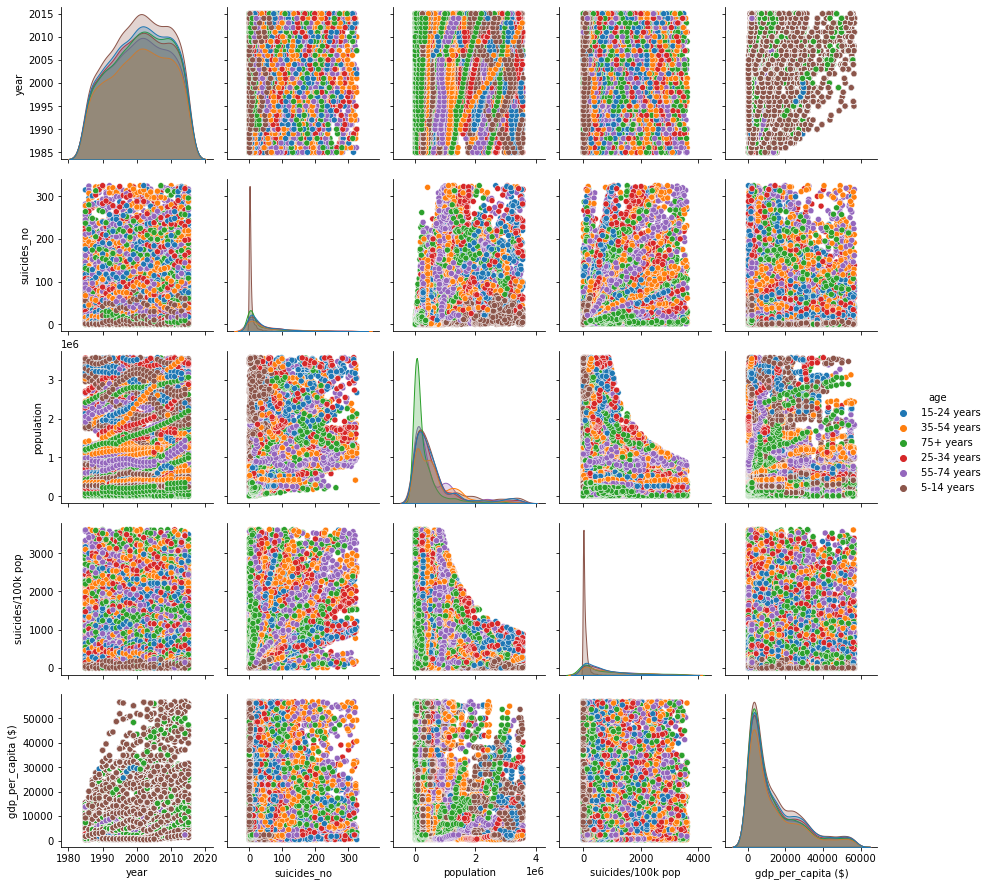

In [380]:
sns.pairplot(df[non_outliers_iqr], hue="age")
plt.show()

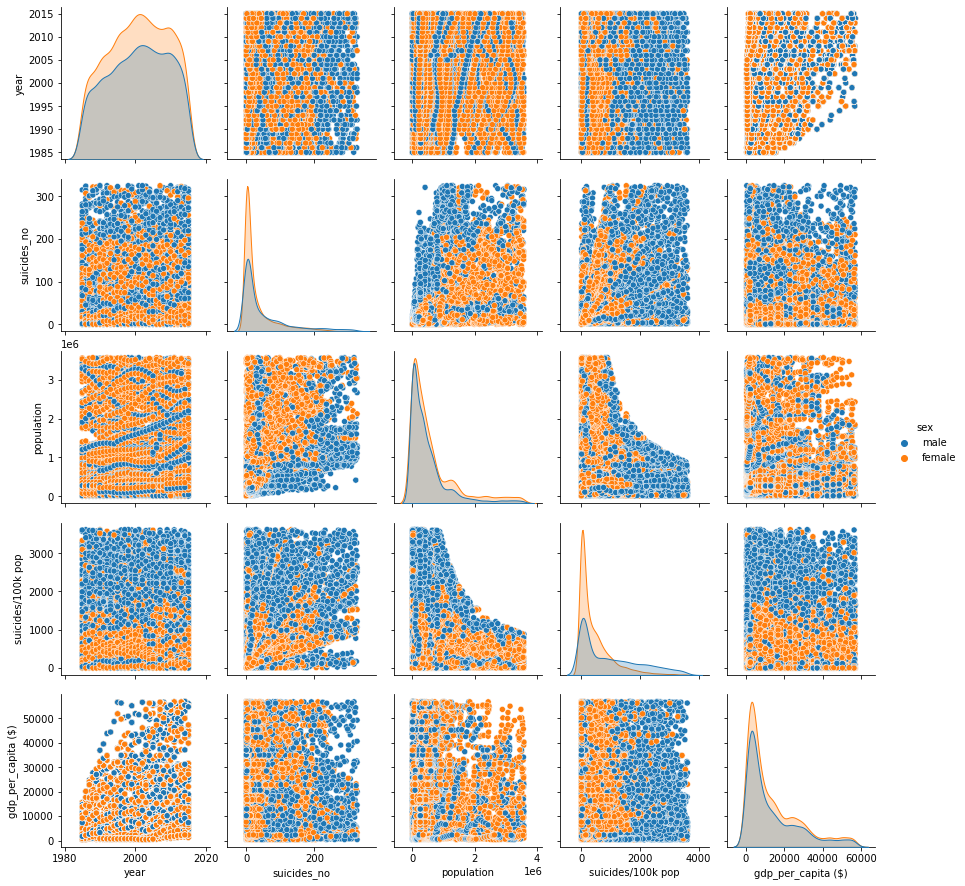

In [388]:
sns.pairplot(df[non_outliers_iqr], hue="sex")
plt.show()

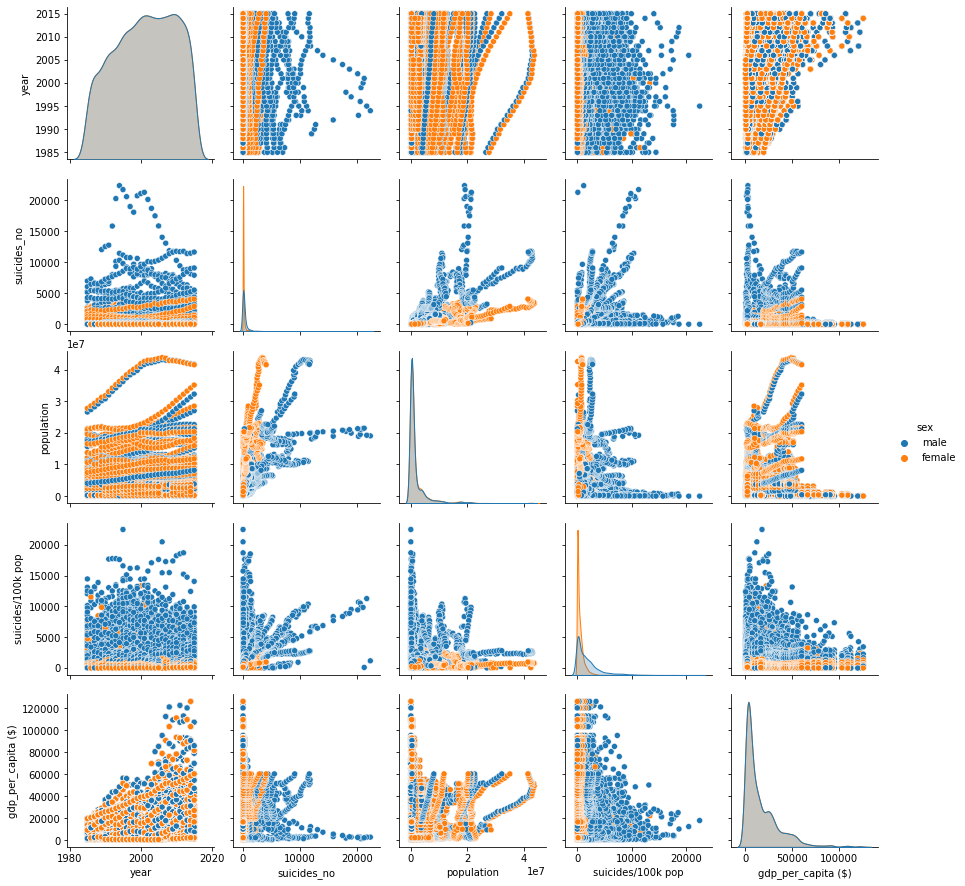

In [402]:
sns.pairplot(df, hue="sex")
plt.show()

In [381]:
# Lithuania data only
LTU_data = df.query('country == "Lithuania"')
LTU_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
15044,Lithuania,1995,male,35-54 years,632,436306,14485,2324
15045,Lithuania,1995,male,75+ years,67,47214,14191,2324
15046,Lithuania,1995,male,55-74 years,325,274196,11853,2324
15047,Lithuania,1995,male,25-34 years,226,284758,7937,2324
15048,Lithuania,1995,male,15-24 years,134,263792,508,2324
...,...,...,...,...,...,...,...,...
15291,Lithuania,2015,female,35-54 years,46,419841,1096,15073
15292,Lithuania,2015,female,25-34 years,17,182926,929,15073
15293,Lithuania,2015,female,15-24 years,10,178882,559,15073
15294,Lithuania,2015,female,5-14 years,3,133506,225,15073


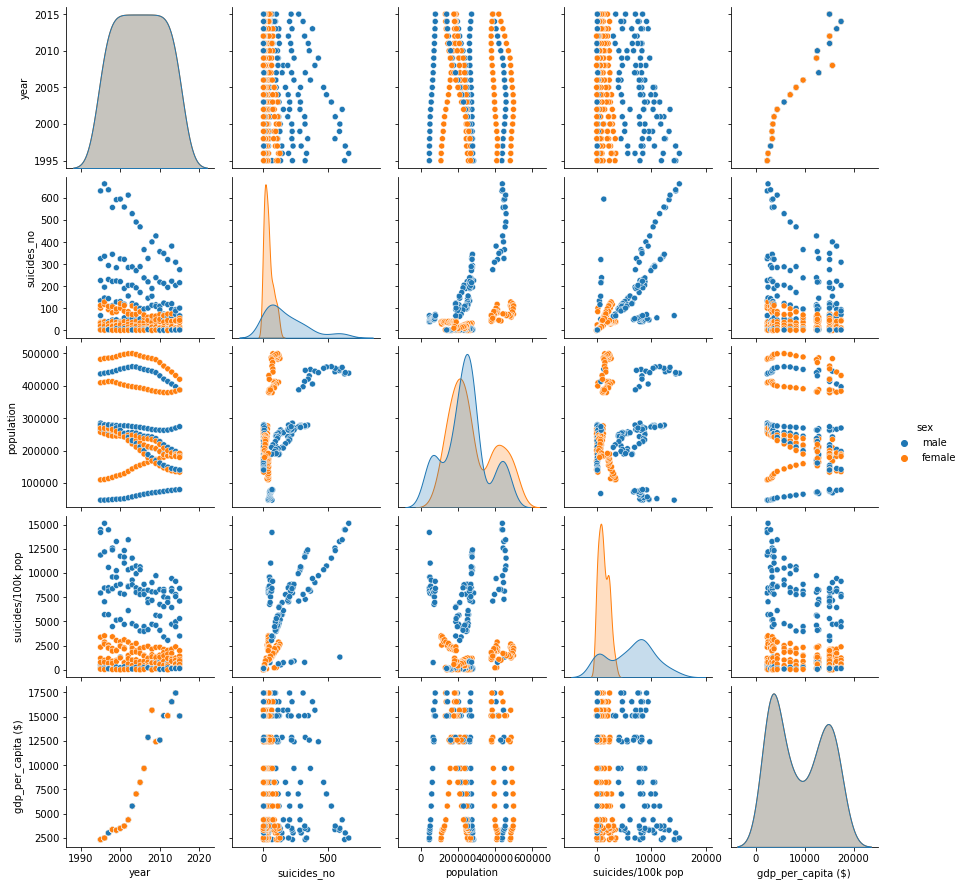

In [382]:
sns.pairplot(LTU_data, hue="sex")
plt.show()

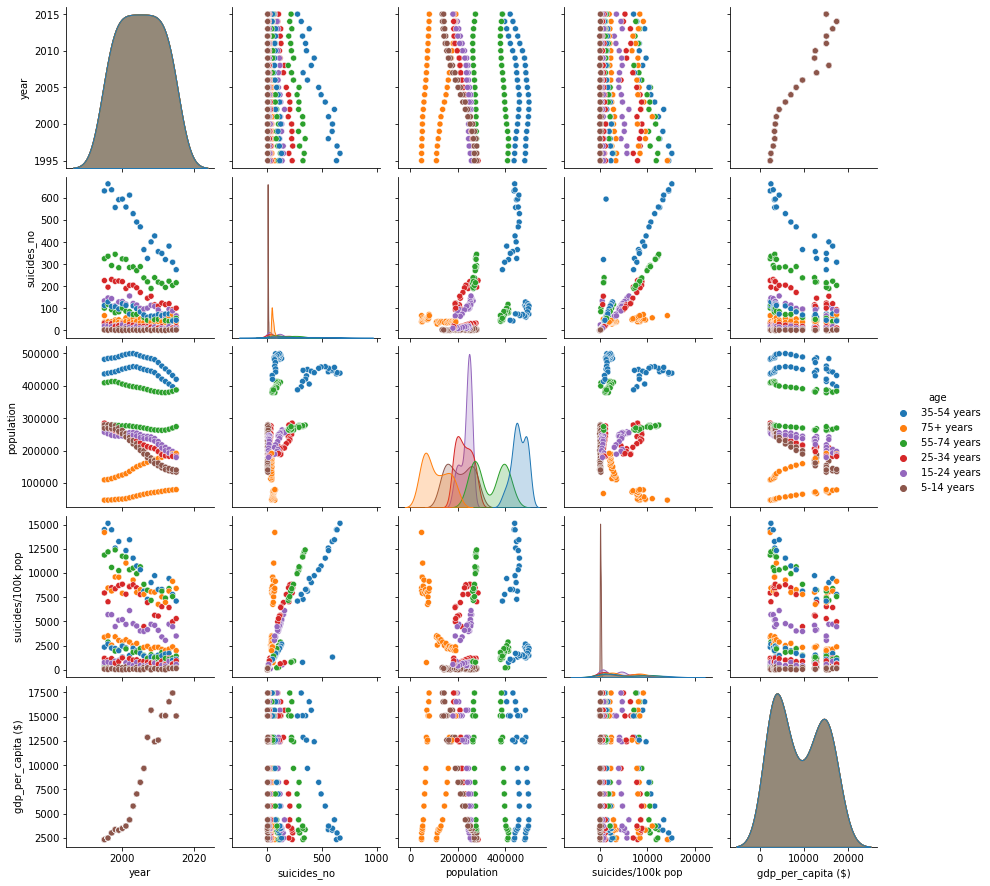

In [383]:
sns.pairplot(LTU_data, hue="age")
plt.show()

# PCA

In [404]:
# Use only numerical columns and filter out rows with outliers and missing values
x = df[num_cols][non_outliers_iqr].values
print(x)
# Normalize the data
x = StandardScaler().fit_transform(x)

# Do PCA transform
pca = PCA(n_components=2)
df_pca = pd.DataFrame(data=pca.fit_transform(x), columns=['pc1', 'pc2'])
df_pca


[[     21  312900     671     796]
 [     16  308000     519     796]
 [     14  289700     483     796]
 ...
 [     60 2762158     217    2309]
 [     44 2631600     167    2309]
 [     21 1438935     146    2309]]


(19908, 2)

In [405]:
# Plot by age
plt.figure(figsize=(10, 10))
classes = df['sex'].unique().tolist()
print(classes)
for class_ in classes:
    indices = df['sex'] == class_
    plt.scatter(df_pca.loc[indices, 'pc1'],
                df_pca.loc[indices, 'pc2'], label=class_)
plt.legend()

['male', 'female']


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 720x720 with 0 Axes>

In [337]:
# Plot by orbit class
plt.figure(figsize=(10, 10))
classes = df['year'].unique().tolist()
for class_ in classes:
    indices = df['year'] == class_
    plt.scatter(df_pca.loc[indices, 'pc1'],
                df_pca.loc[indices, 'pc2'], label=class_)
plt.legend()

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 720x720 with 0 Axes>

# Result interpretation
- How many outliers? 7752 out of 27660 (28%)
- Linear dependencies between variables? There are no strong correlations between variables
- Which 3 main conclusions can be stated in domain terms
 * more suicides were commited by males
 * number of suicides decreases
 * there is a weak positive correlation between a countries GDP (per capita) and suicide rate
 